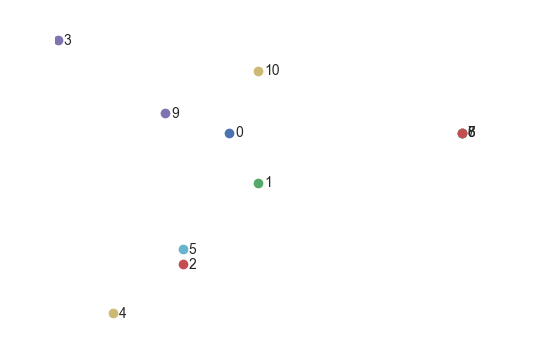

Optimal
2.66695282194
L_0_1 = 0.0
L_0_2 = 0.0
L_10_1 = 0.0
L_10_2 = 0.0
L_1_1 = 1.0
L_1_2 = 0.0
L_2_1 = 1.0
L_2_2 = 0.0
L_3_1 = 2.0
L_3_2 = 0.0
L_4_1 = 2.0
L_4_2 = 0.0
L_5_1 = 0.0
L_5_2 = 0.0
L_6_1 = 1.0
L_6_2 = 0.0
L_7_1 = 0.0
L_7_2 = 0.0
L_8_1 = 0.0
L_8_2 = 0.0
L_9_1 = 1.0
L_9_2 = 0.0
s_0_1 = 0.0
s_0_2 = 0.0
s_10_1 = 59.0405201099
s_10_2 = 4.32009464531
s_1_1 = 3.94281995102
s_1_2 = 0.0
s_2_1 = 27.0362176593
s_2_2 = 0.0
s_3_1 = 12.7625803395
s_3_2 = 0.0
s_4_1 = 31.0245800149
s_4_2 = 0.0
s_5_1 = 25.4907187098
s_5_2 = 0.0
s_6_1 = 44.9053254127
s_6_2 = 0.0
s_7_1 = 0.0
s_7_2 = 0.0
s_8_1 = 45.4053247556
s_8_2 = 0.0
s_9_1 = 19.5089441782
s_9_2 = 0.0
s_sub_5_3 = 0.0
s_sub_6_3 = 0.0
s_sub_7_3 = 30.2211918142
s_sub_8_3 = 0.0
u = 18.4435619941
x_0_0_1 = 0.0
x_0_0_2 = 0.0
x_0_10_1 = 0.0
x_0_10_2 = 1.0
x_0_1_1 = 1.0
x_0_1_2 = 0.0
x_0_2_1 = 0.0
x_0_2_2 = 0.0
x_0_3_1 = 0.0
x_0_3_2 = 0.0
x_0_4_1 = 0.0
x_0_4_2 = 0.0
x_0_5_1 = 0.0
x_0_5_2 = 0.0
x_0_6_1 = 0.0
x_0_6_2 = 0.0
x_0_7_1 = 0.0
x_0_7_2 = 0.0


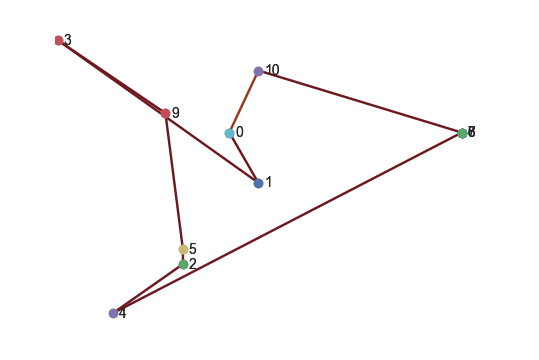

The optimal distance is:  2.11150492558


In [1]:
# coding: utf-8

from pulp import *
import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import preprocessing
%matplotlib inline

# return
# sites, including org and des
# distance matrix,
# locations of each sites
def generate_sites(num_customer_sites):
    # create sites
    sites = list(np.arange(0, 2*num_customer_sites + 3))
    sdtlist1 = []
    sdtlist2 = []
    sdtlist3 = []

    # create distance matrix
    d_matrix = np.zeros((len(sites), len(sites)))

    # random generate points
    np.random.seed(2)
    positions = dict((a, (np.random.rand() - .5, np.random.rand() - .5)) for a in sites)
    # org
    positions[0] = (0, 0)
    # pick up nodes
    # positions[1] = (-0.12, 0.05)
    # positions[2] = (-0.05, -0.05)
    # positions[3] = (0.29, -0.1)
    # positions[4] = (-0.1, 0)
    # det

    positions[5] = (-0.08, -0.15)
    positions[6] = (0.4,0)
    positions[7] = (0.4,0)
    positions[8] = (0.4,0)
    positions[9] = (-0.11, 0.025)
    positions[10] = (0.05, 0.08)

    # plot it
    for s in positions:
        p = positions[s]
        plt.plot(p[0], p[1], 'o')
        plt.text(p[0] + .01, p[1], s, horizontalalignment='left', verticalalignment='center')
    plt.gca().axis('off');
    plt.show()

    # a function for computing distance between two points
    d = lambda p1, p2: np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

    # calculate all the pairs
    for idx1, s1 in enumerate(positions):
        for idx2, s2 in enumerate(positions):
            if s1 != s2:
                d_matrix[idx1, idx2] = d(positions[s1], positions[s2])
    # print(d_matrix)

    for i in range(1,3):
        sdtlist1.append(d(positions[i], positions[5]))
    for j in range(3,5):
        sdtlist2.append(d(positions[j], positions[7]))
    sdtlist3.append(d(positions[9], positions[5]))
    sdtlist3.append(d(positions[9], positions[7]))

    return sites,d_matrix,positions,sdtlist1, sdtlist2, sdtlist3

def get_tours(non_zero_edges,sites,positions,num_customer_sites):

    def get_next_site(parent,vehicle):
        '''helper function to get the next edge'''
        edges = [e for e in non_zero_edges if e[0] == parent and e[2] == vehicle]
        return edges

    tours1 = get_next_site(0,1)
    tours2 = get_next_site(0,2)
    # print (tours1)
    tours1 = [[e] for e in tours1]
    n = 1
    for t in tours1:
        while n < len(sites):
            if t[-1][1] == 2*num_customer_sites+2:
                break
            else:
                t.append(get_next_site(t[-1][1],1)[-1])
                n += 1
    tours2 = [[e] for e in tours2]
    m = 1
    for t1 in tours2:
        while m < len(sites):
            if t1[-1][1] == 2*num_customer_sites+2:
                break
            else:
                t1.append(get_next_site(t1[-1][1],2)[-1])
                m += 1

    # The optimal tours:
    for t in tours1:
        print(' -> '.join([ str(a) for a,b,c in t]+['10']))
    for t1 in tours2:
        print(' -> '.join([ str(a) for a,b,c in t1]+['10']))

    # draw the tours1
    colors = [np.random.rand(3) for i in range(len(tours1))]
    for t, h in zip(tours1, colors):
        for d, f, g in t:
            p1, p2 = positions[d], positions[f]
            plt.plot([p1[0], p2[0]], [p1[1], p2[1]], color=h)

    # draw the map again
    for s in positions:
        p = positions[s]
        plt.plot(p[0], p[1], 'o')
        plt.text(p[0] + .01, p[1], s, horizontalalignment='left', verticalalignment='center')

    # draw the tours2
    colors2 = [np.random.rand(3) for i in range(len(tours2))]
    for t, h in zip(tours2, colors2):
        for d, f, g in t:
            p1, p2 = positions[d], positions[f]
            plt.plot([p1[0], p2[0]], [p1[1], p2[1]], color=h)

    # draw the map again
    for s in positions:
        p = positions[s]
        plt.plot(p[0], p[1], 'o')
        plt.text(p[0] + .01, p[1], s, horizontalalignment='left', verticalalignment='center')

    plt.gca().axis('off');
    plt.show()

    return tours1, tours2

def main():

    num_customer_sites = 4
    capacity = 2
    # num_K = 1
    num_K = math.ceil(num_customer_sites/capacity)  # the number of cars
    K = list(np.arange(1, num_K + 1))
    K_sub = list(np.arange(3, 4))
    p_waiting = 1
    d_waiting = 0.5
    sub_waiting = 0.5
    M = 9999
    speed = 0.05
    sdtime1 = []
    sdtime2 = []
    sdtime3 = []

    p_sub = [1, 2, 3, 4]
    d_sub = [5, 6,7,8]

    # geneate sites
    sites, d_matrix, positions, sdtlist1, sdtlist2, sdtlist3 = generate_sites(num_customer_sites)
    t_matrix = d_matrix / speed

    # calculate self-driving time
    for a in range(0, len(sdtlist1)):
        sdtime1.append(sdtlist1[a] / speed)
    for b in range(0, len(sdtlist2)):
        sdtime2.append(sdtlist2[b] / speed)
    for c in range(0, len(sdtlist3)):
        sdtime3.append(sdtlist3[c] / speed)

    scaled_sdtime1 = (sdtime1 - t_matrix.min()) / (t_matrix.max() - t_matrix.min())
    scaled_sdtime2 = (sdtime2 - t_matrix.min()) / (t_matrix.max() - t_matrix.min())
    scaled_sdtime3 = (sdtime3 - t_matrix.min()) / (t_matrix.max() - t_matrix.min())
    scaled_p_waiting = (p_waiting - t_matrix.min()) / (t_matrix.max() - t_matrix.min())
    scaled_d_waiting = (d_waiting - t_matrix.min()) / (t_matrix.max() - t_matrix.min())
    scaled_sub_waiting = (sub_waiting - t_matrix.min()) / (t_matrix.max() - t_matrix.min())

    # Create a minimum and maximum processor object
    min_max_scaler = preprocessing.MinMaxScaler()

    # Create an object to transform the data to fit minmax processor
    scaled_d_matrix = min_max_scaler.fit_transform(d_matrix)
    scaled_t_matrix = min_max_scaler.fit_transform(t_matrix)

    #generate indices for distance matrix
    X,Y,Z = np.meshgrid( np.arange(len(sites)), np.arange(len(sites)),np.arange(1,num_K+1))
    x_matrix_coordinate_list = []
    for coor in zip(X.flatten(),Y.flatten(),Z.flatten()):
        x_matrix_coordinate_list.append(coor)

    #generate indices for start time
    X1,Y1 = np.meshgrid( np.arange(len(sites)), np.arange(1,num_K+1))
    start_time_coordinate_list = []
    for coor1 in zip(X1.flatten(),Y1.flatten()):
        start_time_coordinate_list.append(coor1)

    #generate indices for Yik
    X3,Y3 = np.meshgrid( np.arange(len(p_sub)+1), np.arange(1,num_K+1))
    yik_coordinate_list = []
    for coor1 in zip(X3.flatten(),Y3.flatten()):
        yik_coordinate_list.append(coor1)


    #generate indices for all rows and cols
    X2,Y2 = np.meshgrid( np.arange(len(sites)), np.arange(len(sites)))
    rc_coordinate_list = []
    for coor2 in zip(X2.flatten(),Y2.flatten()):
        rc_coordinate_list.append(coor2)

    #create the problme
    prob=LpProblem("pdpd",LpMinimize)


    # indicator variable if site i is connected to site j in the tour
    x = LpVariable.dicts('x', (sites,sites,K), 0, 1, LpBinary)
    y = LpVariable.dicts('y', (p_sub, K), 0, 1, LpBinary)
    s = LpVariable.dicts('s', (sites,K), 0, None , LpContinuous)
    s_sub = LpVariable.dicts('s_sub', (d_sub, K_sub), 0, None, LpContinuous)
    L = LpVariable.dicts('L', (sites, K), 0, None, LpContinuous)
    u = LpVariable('u', 0, None ,LpContinuous)

    dist = sum([x[r][c][z] * scaled_d_matrix[r, c] for (r, c, z) in x_matrix_coordinate_list])
    avgtime =  sum([s[r+num_customer_sites][c]+ s_sub[r+num_customer_sites][3] - s[r][c] for (r,c) in start_time_coordinate_list if r < num_customer_sites+1 and r >0])/num_customer_sites
    total_travel_time = (s[2*num_customer_sites+2][1]+s[2*num_customer_sites+2][2])/num_K
    num_transfer = sum([y[r][c] for (r,c) in yik_coordinate_list if r != 0])

    # the objective
    alpha = 0.55
    beta = 0.05
    gamma = 0.05
    sita = 0.05
    omiga = 0.3

    cost = lpSum(alpha * dist + beta * avgtime + gamma * u + sita * total_travel_time + omiga * num_transfer)
    prob+=cost

    # add constraints
    # (2) org can not go to des
    # for (r, c, z) in x_matrix_coordinate_list:
    #     if (r == 0 and ( c == 6 or c == 7 or c == 8 or c == 9 or c == 10 or c == 11 )) :
    #         prob += x[r][c][z] == 0
    # #
    # prob += lpSum([x[r][c][z] for (r, c, z) in x_matrix_coordinate_list if (r == 2*num_customer_sites+2)]) == 0
    # #
    for (r, c, z) in x_matrix_coordinate_list:
        if (c == 0):
            prob += x[r][c][z] == 0
    # ############################################################################################################################
    # ###########          papaer constraints      ###############################################################################
    # ############################################################################################################################
    # 1
    for i in range(1, num_customer_sites+1):
        prob += lpSum([x[r][c][z] for (r, c, z) in x_matrix_coordinate_list if r == i and c !=0 and c != 2*num_customer_sites+2]) == 1

    # 2
    for j in range(1, num_customer_sites + 1):
        prob += lpSum([y[r][c] for (r,c) in yik_coordinate_list if r == j]) <= 1
    # #
    # 3
    for k in range(1, num_customer_sites + 1):
        prob += lpSum([x[r][c][z] for (r, c, z) in x_matrix_coordinate_list if (r == k) and z == 1]) - lpSum([x[r][c][z] for (r, c, z) in x_matrix_coordinate_list if (c == k + num_customer_sites) and z == 1]) - M*y[k][1] <= 0

        prob += lpSum([x[r][c][z] for (r, c, z) in x_matrix_coordinate_list if (r == k) and z == 1]) - lpSum([x[r][c][z] for (r, c, z) in x_matrix_coordinate_list if (c == k + num_customer_sites) and z == 1]) + M * y[k][1] >= 0

        prob += lpSum([x[r][c][z] for (r, c, z) in x_matrix_coordinate_list if (r == k) and z == 2]) - lpSum([x[r][c][z] for (r, c, z) in x_matrix_coordinate_list if (c == k + num_customer_sites) and z == 2]) - M*y[k][2] <= 0

        prob += lpSum([x[r][c][z] for (r, c, z) in x_matrix_coordinate_list if (r == k) and z == 2]) - lpSum([x[r][c][z] for (r, c, z) in x_matrix_coordinate_list if (c == k + num_customer_sites) and z == 2]) + M * y[k][2] >= 0
    #
    # #4
    for l in range(1, num_customer_sites + 1):
        prob += lpSum([x[r][c][z] for (r, c, z) in x_matrix_coordinate_list if (r == l) and z == 1]) - lpSum([x[r][c][z] for (r, c, z) in x_matrix_coordinate_list if (c == 2*num_customer_sites+1) and z == 1]) - M*(1-y[l][1]) <= 0
        prob += lpSum([x[r][c][z] for (r, c, z) in x_matrix_coordinate_list if (r == l) and z == 1]) - lpSum([x[r][c][z] for (r, c, z) in x_matrix_coordinate_list if (c == 2 * num_customer_sites + 1) and z == 1]) + M * (1 - y[l][1]) >= 0

        prob += lpSum([x[r][c][z] for (r, c, z) in x_matrix_coordinate_list if (r == l) and z == 2]) - lpSum([x[r][c][z] for (r, c, z) in x_matrix_coordinate_list if (c == 2*num_customer_sites+1) and z == 2]) - M*(1-y[l][2]) <= 0

        prob += lpSum([x[r][c][z] for (r, c, z) in x_matrix_coordinate_list if (r == l) and z == 2]) - lpSum([x[r][c][z] for (r, c, z) in x_matrix_coordinate_list if (c == 2*num_customer_sites+1) and z == 2]) + M * (1-y[l][2]) >= 0
    #
    # #5
    for m in range(1, num_customer_sites + 1):
        prob += lpSum([x[r][c][z] for (r, c, z) in x_matrix_coordinate_list if c == m + num_customer_sites]) + lpSum([y[r][c] for (r,c) in yik_coordinate_list if r == m]) == 1

    # #6
    prob += lpSum([x[r][c][z] for (r, c, z) in x_matrix_coordinate_list if r == 0 and z == 1 and (c == 1 or c == 2 or c == 3 or c == 4 or c == 10)]) == 1
    prob += lpSum([x[r][c][z] for (r, c, z) in x_matrix_coordinate_list if r == 0 and z == 2 and (c == 1 or c == 2 or c == 3 or c == 4 or c == 10)]) == 1
    #
    # #7
    prob += lpSum([x[r][c][z] for (r, c, z) in x_matrix_coordinate_list if c == 2 * num_customer_sites + 2 and z == 1 and (r == 0 or r == 5 or r == 6 or r == 7 or r == 8 or r == 9 )]) == 1
    prob += lpSum([x[r][c][z] for (r, c, z) in x_matrix_coordinate_list if c == 2 * num_customer_sites + 2 and z == 2 and (r == 0 or r == 5 or r == 6 or r == 7 or r == 8 or r == 9 )]) == 1
    #
    # #8
    for n in range(1, 2*num_customer_sites+2):
        prob += lpSum([x[r][c][z] for (r, c, z) in x_matrix_coordinate_list if c == n and z == 1]) - lpSum([x[r][c][z] for (r, c, z) in x_matrix_coordinate_list if r == n and z == 1]) == 0
        prob += lpSum([x[r][c][z] for (r, c, z) in x_matrix_coordinate_list if c == n and z == 2]) - lpSum([x[r][c][z] for (r, c, z) in x_matrix_coordinate_list if r == n and z == 2]) == 0

    # for v in range(1, num_customer_sites + 1):
    #     prob += lpSum([x[r][c][z] for (r, c, z) in x_matrix_coordinate_list if
    #                    c == 9 and r == v and z == 1]) - lpSum(
    #         [x[r][c][z] for (r, c, z) in x_matrix_coordinate_list if
    #          r == 9 and c == v + num_customer_sites and z == 1]) == 0
    #     prob += lpSum([x[r][c][z] for (r, c, z) in x_matrix_coordinate_list if
    #                    c == 9 and r == v and z == 2]) - lpSum(
    #         [x[r][c][z] for (r, c, z) in x_matrix_coordinate_list if
    #          r == 9 and c == v + num_customer_sites and z == 2]) == 0


            # #

    # #
    #9
    for (r, c, z) in x_matrix_coordinate_list:
        if scaled_t_matrix[r, c] == 0:
            prob += s[c][z] - s[r][z] + M * (1 - x[r][c][z]) >= scaled_d_waiting
        else:
            prob += s[c][z] - s[r][z] - scaled_t_matrix[r, c] + M * (1 - x[r][c][z]) >= scaled_p_waiting
    #
    # #10
    for o in range(1,num_customer_sites+1):
        prob += s[9][1]+scaled_t_matrix[9,o+num_customer_sites] + scaled_sub_waiting - s_sub[o+num_customer_sites][3] <= M * (1 - y[o][1])
        prob += s[9][2] + scaled_t_matrix[9, o + num_customer_sites] + scaled_sub_waiting - s_sub[o + num_customer_sites][3] <= M * (1 - y[o][2])
    #
    #11
    for (r,c) in yik_coordinate_list:
        if r != 0:
            prob += s[r][c] - s[r+num_customer_sites][c] <= M * y[r][c]
    #
    #12
    for (r,c) in yik_coordinate_list:
        if r != 0:
            prob += s[r][c] - s[9][c] <= M * (1 - y[r][c])
    #
    #13
    prob += s[9][1] <= 0 + M * lpSum([y[r][c] for (r,c) in yik_coordinate_list if c == 1 and r != 0])
    prob += s[9][2] <= 0 + M * lpSum([y[r][c] for (r, c) in yik_coordinate_list if c == 2 and r != 0])
    #
    #14
    for p in range(1,num_customer_sites+1):
        prob += s_sub[p+num_customer_sites][3] <= 0 + M * lpSum([y[r][c] for (r, c) in yik_coordinate_list if r == p])
    #
    #15
    for (r, c) in yik_coordinate_list:
        if r != 0:
            prob += lpSum([s[r+num_customer_sites][a] for a in range(1,3)]) <= 0 + M * (1 - y[r][c])
    #
    #16
    for p in range(1,3):
        prob += u - (s[p+num_customer_sites][1] + s_sub[p+num_customer_sites][3]- s[p][1]) + scaled_sdtime1[p - 1] >= 0
        prob += u - (s[p + num_customer_sites][2] + s_sub[p + num_customer_sites][3] - s[p][2]) + scaled_sdtime1[p - 1] >= 0

    for q in range(3,5):
        prob += u - (s[q+num_customer_sites][1] + s_sub[q+num_customer_sites][3] - s[q][1]) + scaled_sdtime2[q - 3] >= 0
        prob += u - (s[q+num_customer_sites][2] + s_sub[q+num_customer_sites][3] - s[q][2]) + scaled_sdtime2[q - 3] >= 0
    #
    #17
    for (r, c, z) in x_matrix_coordinate_list:
        if c == 1 or c == 2 or c == 3 or c == 4:
            prob += L[r][z] - L[c][z] - M * (1 - x[r][c][z]) + 1 <= 0
            prob += L[r][z] - L[c][z] + M * (1 - x[r][c][z]) + 1 >= 0
    for (r, c, z) in x_matrix_coordinate_list:
        if c == 5 or c == 6 or c == 7 or c == 8 :
            prob += L[r][z] - L[c][z] - M * (1 - x[r][c][z]) - 1 <= 0
            prob += L[r][z] - L[c][z] + M * (1 - x[r][c][z]) - 1 >= 0
    #
    # #18
    for (r, c, z) in x_matrix_coordinate_list:
        if c == 9:
            prob += L[r][z] - lpSum([y[a][z] for a in range(1,num_customer_sites+1)]) - L[9][z] <= M * (1 - x[r][c][z])
            prob += L[r][z] - lpSum([y[a][z] for a in range(1, num_customer_sites + 1)]) - L[9][z] >= - M * (1 - x[r][c][z])
    #
    #19
    for (r, c) in start_time_coordinate_list:
        prob += L[r][c] <= capacity
    #
    #20
    L[0][1] = 0
    L[0][2] = 0
    L[2*num_customer_sites+2][1] = 0
    L[2*num_customer_sites+2][2] = 0

    s[0][1] = 0
    s[0][2] = 0
    ############################################################################################################################
    ######################      end of constraints        ######################################################################
    ############################################################################################################################
    # The problem data is written to an .lp file
    # prob.writeLP("my_problem.lp")
    result = prob.solve()
    print(LpStatus[prob.status])

    # print solution
    print(value(prob.objective))
    for v in prob.variables():
        if v.name.startswith('s') or v.name.startswith('u'):
            print(v.name, "=",v.varValue * (t_matrix.max() - t_matrix.min()) +t_matrix.min())
        else:
            print(v.name, "=", v.varValue)

    non_zero_edges = [ e for e in x_matrix_coordinate_list if value(x[e[0]][e[1]][e[2]]) != 0 ]
    print("All non zero edges are : ")
    print (non_zero_edges)

    totaldist = []
    tours1,tours2 = get_tours(non_zero_edges, sites,positions,num_customer_sites)
    for a, b,c in non_zero_edges:
        totaldist.append(d_matrix[a, b])

    print("The optimal distance is: ", sum(totaldist))
    # see the result
    # visualize_result(non_zero_edges, sites, positions)



if __name__ == '__main__':
    main()